SIMPLE SHAP on ML MODEL(Local and Global)

In [2]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor

D:\SEM6\XAI_LAB_REQ\xai_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df=pd.read_csv('Dataset/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X=df.drop('quality',axis=1)
y=df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)


[5.22 5.19 5.35 5.21 5.98 5.04 5.12 4.94 5.9  5.81 6.76 5.35 5.89 5.25
 5.5  6.5  5.35 5.81 6.85 5.08 4.89 5.9  5.3  6.03 5.49 5.97 6.51 5.29
 5.26 6.04 5.3  5.52 5.92 5.51 5.77 5.07 6.28 5.97 5.54 6.17 5.2  5.16
 6.31 5.02 5.56 5.62 6.43 5.73 5.14 5.6  5.04 5.35 5.5  7.14 5.32 5.75
 5.99 6.07 5.56 5.01 5.6  6.21 5.5  5.21 6.68 5.33 6.72 5.66 6.55 5.55
 6.15 5.27 5.77 5.42 6.05 5.03 6.38 5.19 5.84 6.54 5.13 6.82 5.15 5.63
 5.84 6.45 5.06 5.95 6.5  5.58 6.32 5.59 5.01 5.2  5.35 5.51 5.15 5.83
 4.45 5.49 5.08 5.09 5.78 6.51 5.21 6.61 5.8  5.26 5.12 5.26 6.48 5.01
 6.43 5.01 5.24 6.16 5.36 5.24 5.02 5.84 6.16 5.82 5.85 5.43 5.69 5.29
 6.31 5.45 5.27 5.55 5.77 5.37 5.04 6.3  5.6  5.03 4.99 5.45 5.21 5.9
 6.73 6.25 6.61 5.18 5.56 5.09 5.53 5.69 5.58 5.1  5.84 6.27 5.41 5.21
 5.77 5.48 5.57 6.54 5.27 5.97 5.91 5.56 6.3  5.08 5.42 5.78 5.54 5.03
 4.6  5.15 5.1  4.99 6.55 5.3  6.42 5.87 6.27 5.05 5.39 5.17 4.54 6.
 5.4  6.34 5.05 6.45 5.79 5.87 6.73 5.3  5.63 5.91 5.15 6.29 5.71 5.07
 4.6  5.8

In [5]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2:",r2)
print("mse:",mse)

r2: 0.5243601368819021
mse: 0.3108334375


In [6]:
import shap
exp=shap.Explainer(model)
shap_values=exp(X_test)

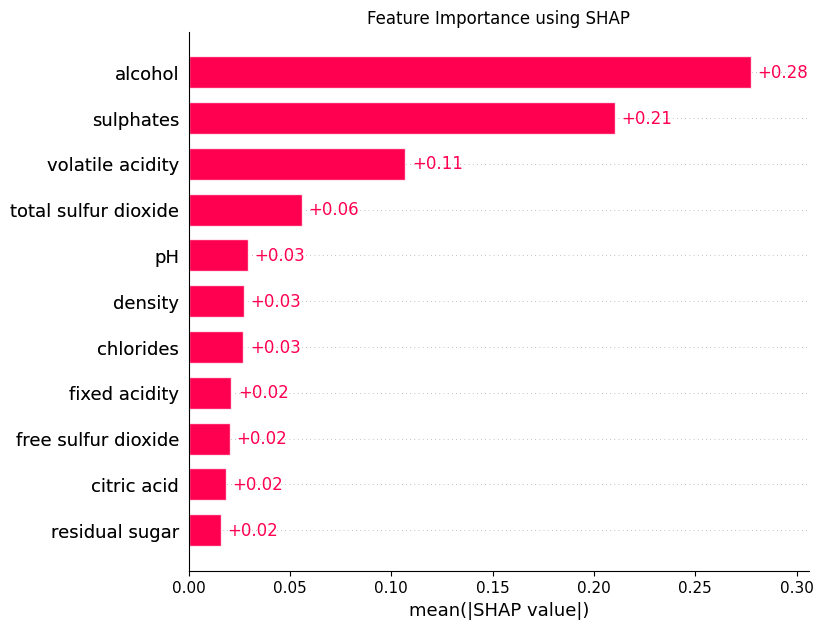

'\nPro - Easy to interpret and very helpful to identify the dominating features based on the collective interactive with other features using SHAP values.\nCon - Since it shows features based on mean absolute Shap values, it is hard to identify features which are positively influencing the model and \nnegatively influencing the model.'

In [7]:
#Global Explanation

import matplotlib.pyplot as plt
plt.title('Feature Importance using SHAP')
shap.plots.bar(shap_values,max_display=12)
#shap.summary_plot(shap_values, X_test, plot_type="bar", show=False) can use this also...

'''
Pro - Easy to interpret and very helpful to identify the dominating features based on the collective interactive with other features using SHAP values.
Con - Since it shows features based on mean absolute Shap values, it is hard to identify features which are positively influencing the model and 
negatively influencing the model.'''

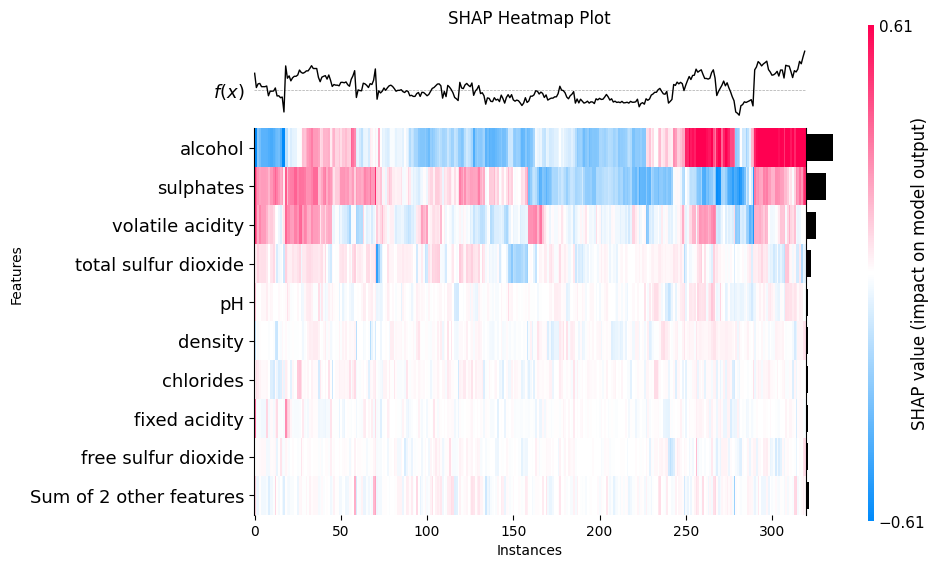

<Axes: title={'center': 'SHAP Heatmap Plot'}, xlabel='Instances', ylabel='Features'>

In [8]:
#Global Explanation

plt.ylabel('Features')
plt.title('SHAP Heatmap Plot')
shap.plots.heatmap(shap_values)

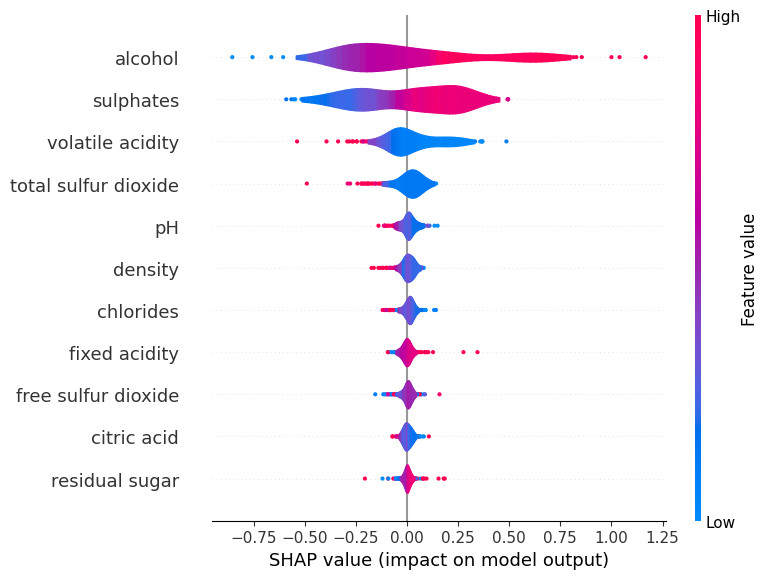

In [15]:
#Global Explanation

shap.summary_plot(shap_values, X_test, plot_type="violin", show=False)

In [22]:
shap_values

.values =
array([[-0.00125458, -0.07924937,  0.01933421, ...,  0.00889598,
         0.07768376, -0.33298964],
       [ 0.01820873,  0.02506179,  0.00948633, ...,  0.0067337 ,
        -0.1789922 , -0.23574238],
       [-0.03157709, -0.15069091, -0.0156445 , ..., -0.01037908,
         0.20020352, -0.22711826],
       ...,
       [ 0.00813874, -0.05083412, -0.02967965, ..., -0.00066532,
        -0.20178142, -0.19528834],
       [-0.04053399,  0.21631809, -0.01670372, ...,  0.08124287,
         0.15452721,  0.21665276],
       [ 0.01696744, -0.07817521,  0.01120883, ...,  0.00677228,
        -0.19084645, -0.20470102]])

.base_values =
array([5.62372166, 5.62372166, 5.62372166, 5.62372166, 5.62372166,
       5.62372166, 5.62372166, 5.62372166, 5.62372166, 5.62372166,
       5.62372166, 5.62372166, 5.62372166, 5.62372166, 5.62372166,
       5.62372166, 5.62372166, 5.62372166, 5.62372166, 5.62372166,
       5.62372166, 5.62372166, 5.62372166, 5.62372166, 5.62372166,
       5.62372166, 5.62372

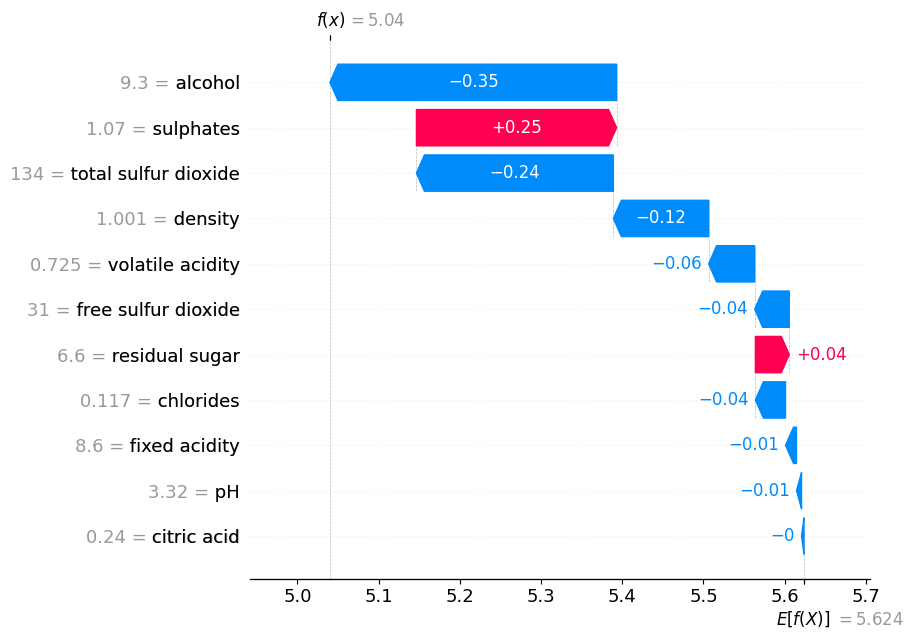

In [23]:
#Local Explainability using waterfall plot for 50th instance
shap.plots.waterfall(shap_values[50], max_display = 12)

In [32]:
#KERNEL EXPLAINER
kexp=shap.KernelExplainer(model.predict,X_train)
shap_values=kexp.shap_values(X_test.iloc[:3])

Using 1279 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:59<00:00, 39.70s/it]


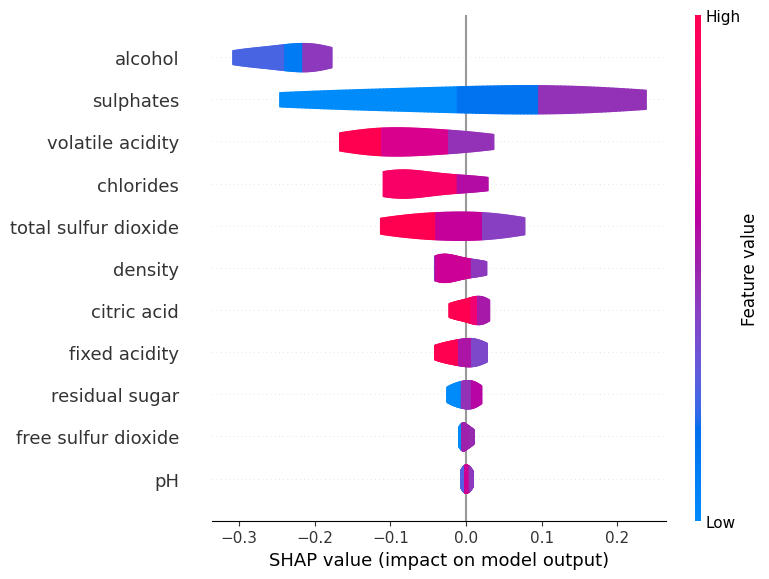

In [49]:
#Global Interpretability
#X_test.iloc[:3] because we found only 3 shapely values
shap.summary_plot(shap_values,X_test.iloc[:3],plot_type='violin')

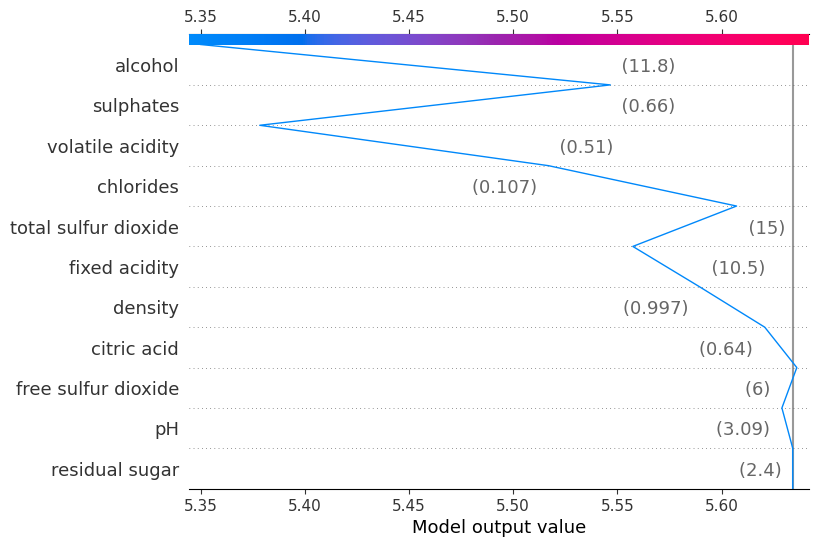

In [53]:
shap.decision_plot(kexp.expected_value, shap_values[2], X_test.iloc[10,:])
#How model predicts for 10th sample for 2nd instance if we remove it will show 3 lines i.e all 3 instances

SHAP ON DL MODELS

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[('n02129165', 'lion', 0.9999653), ('n02112137', 'chow', 1.2725454e-05), ('n02128757', 'snow_leopard', 4.5771635e-06)]
Predicted: lion (100.00%)


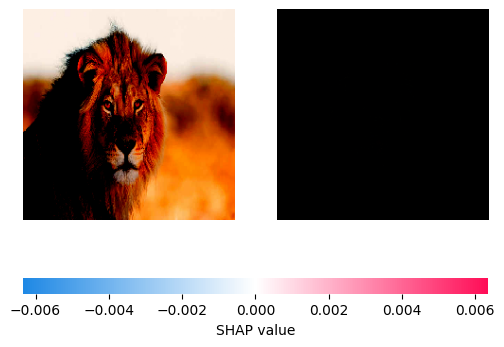

In [8]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet,VGG16
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the model
#model = Mobilenet(weights='imagenet')
model=load_model('mobilenet_model.h5')
# Load and preprocess image
img_path = 'Dataset/lion.jpg'  # change this path
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_preprocessed = preprocess_input(np.expand_dims(img_array, axis=0))

# Show top predicted class
preds = model.predict(img_preprocessed)
top_pred = decode_predictions(preds, top=3)[0]
print(top_pred)
print(f"Predicted: {top_pred[0][1]} ({top_pred[0][2]*100:.2f}%)")

# Background: use multiple zeros or random images for better explanations
background = preprocess_input(np.ones((1, 224, 224, 3)) * 255) # try random sampled ones for better result

# Use GradientExplainer (only accepts NumPy arrays!)
explainer = shap.GradientExplainer(model, background)

# Compute SHAP values for the top predicted class
# Note: ranked_outputs=1 returns SHAP for top class only
shap_values, indexes = explainer.shap_values(
    img_preprocessed,
    ranked_outputs=2
)

# Plot SHAP values
shap.image_plot(shap_values, img_preprocessed)


In [6]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [18]:
import shap
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input,decode_predictions
model=load_model('mobilenet_model.h5')

path='Dataset/elephant.jpg'
img=load_img(path,target_size=(224,224))
img_arr=img_to_array(img)
img_preprocess=preprocess_input(np.expand_dims(img_arr,axis=0))

predicted=model.predict(img_preprocess)
#print(predicted)
top_pred=decode_predictions(predicted,top=3)[0]
print(top_pred)

bg=preprocess_input(np.ones((1,224,224,3))*255)

exp=shap.GradientExplainer(model,bg)
shap_values,indexs=exp.shap_values(img_preprocess,ranked_outputs=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[('n01871265', 'tusker', 0.7110895), ('n02504458', 'African_elephant', 0.28611177), ('n02504013', 'Indian_elephant', 0.0027678406)]


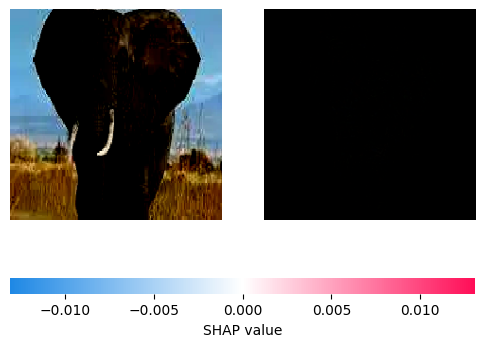

In [19]:
shap.image_plot(shap_values,img_preprocess)

In [5]:
import shap

In [6]:
shap.decision_plot?

Signature:
shap.decision_plot(
    base_value: 'float | np.ndarray',
    shap_values: 'np.ndarray',
    features: 'np.ndarray | pd.Series | pd.DataFrame | list | None' = None,
    feature_names=None,
    feature_order='importance',
    feature_display_range=None,
    highlight=None,
    link='identity',
    plot_color=None,
    axis_color='#333333',
    y_demarc_color='#333333',
    alpha=None,
    color_bar=True,
    auto_size_plot=True,
    title=None,
    xlim=None,
    show=True,
    return_objects=False,
    ignore_warnings=False,
    new_base_value=None,
    legend_labels=None,
    legend_location='best',
) -> 'DecisionPlotResult | None'
Docstring:
Visualize model decisions using cumulative SHAP values.

Each plotted line explains a single model prediction. If a single prediction is plotted, feature values will be
printed in the plot (if supplied). If multiple predictions are plotted together, feature values will not be printed.
Plotting too many predictions together will make th